In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
bbl = pd.read_csv('./dataset_airbnb-scraper.csv')

C:\Users\jsu\AppData\Local\Temp\ipykernel_29316\1937519020.py:1: DtypeWarning: Columns (234,261,264,267,276,282,288,291,294,297,300,306,309,312,315,318,321,324,327,330,333,336,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,385,386,388,389,391,392,394,395,397,398,400,401,403,404,406,407,409,410,412,413,415,416,418,419,421,422,424,425,427,428,430,431,433,434,436,437,458,462,463,464,483,486,487,488,508,511,512,513,533,536,537,538,558,561,562,563,583,586,587,588,589,608,611,612,613,633,636,637,638,639,658,661,662,663,664,683,686,687,688,689,708,711,712,713,733,736,737,738,758,761,762,763,789,808,811,812,813,833,836,837,838,858,861,862,863,864,883,886,887,888,889,914,936,983,986,987,988,989,1014,1033,1036,1037,1038,1058,1061,1062,1063,1091,1092,1093) have mixed types. Specify dtype option on import or set low_memory=False.
  bbl = pd.read_csv('./dataset_airbnb-scr

In [3]:
# Check host that has most listings
top_host = bbl[['primaryHost/firstName', 'primaryHost/id','url']].groupby(['primaryHost/firstName', 'primaryHost/id'])['url'] \
                             .count().nlargest(11)
top_host

primaryHost/firstName  primaryHost/id
Destination Big Bear   7041175           186
Cool Cabins            127532570          98
Evolve                 126644161          38
Big Bear Vacations     84772237           33
Mario & Ivette         8783642            26
Sleepy Forest Resort   499244             26
Agustin                346270129          21
Holly                  163330593          21
Molly Mei              56666259           21
Vacasa California      111814852          20
Claire                 142491584          18
Name: url, dtype: int64

In [4]:
# Check host that has most listings
less_star = bbl[['primaryHost/firstName', 'primaryHost/id', 'stars']].groupby(['primaryHost/firstName', 'primaryHost/id']).agg('mean')\
                    .reset_index() \
                    .sort_values(['stars'],ascending=True)\
                    .set_index(['primaryHost/id', 'primaryHost/firstName']) \
                    .head(20)

less_star

,,stars
primaryHost/id,primaryHost/firstName,
305754294,Sarah,3.900000
261070436,JJ Mac Mrgrld,4.000000
29443741,Koweiiii,4.000000
358118632,Richard,4.100000
44808634,Alan,4.150000
15146871,Vacasa California,4.210000
309564485,The Element,4.240000
432348935,Big Bear Getaway,4.247692
43865817,John,4.250000


In [5]:
review_cmmts = ['reviews/0/comments', 'reviews/1/comments', 'reviews/2/comments', 'reviews/3/comments', 'reviews/4/comments', 'reviews/5/comments', \
'reviews/6/comments', 'reviews/7/comments', 'reviews/8/comments', 'reviews/9/comments', 'reviews/10/comments', 'reviews/11/comments', \
'reviews/12/comments', 'reviews/13/comments', 'reviews/14/comments', 'reviews/15/comments', 'reviews/16/comments', 'reviews/17/comments', \
'reviews/18/comments', 'reviews/19/comments', 'reviews/20/comments', 'reviews/21/comments', 'reviews/22/comments', 'reviews/23/comments', \
'reviews/24/comments', 'primaryHost/id']

In [6]:
bbl_reviews = bbl[['reviews/0/comments', 'reviews/1/comments', 'reviews/2/comments', 'reviews/3/comments', 'reviews/4/comments', 'reviews/5/comments', \
'reviews/6/comments', 'reviews/7/comments', 'reviews/8/comments', 'reviews/9/comments', 'reviews/10/comments', 'reviews/11/comments', \
'reviews/12/comments', 'reviews/13/comments', 'reviews/14/comments', 'reviews/15/comments', 'reviews/16/comments', 'reviews/17/comments', \
'reviews/18/comments', 'reviews/19/comments', 'reviews/20/comments', 'reviews/21/comments', 'reviews/22/comments', 'reviews/23/comments', \
'reviews/24/comments', 'primaryHost/id']]

In [7]:
bbl_reviews = bbl_reviews.dropna()

In [8]:
# merge all reviews 
bbl_reviews['all_reviews'] = bbl_reviews[['reviews/0/comments', 'reviews/1/comments', 'reviews/2/comments', 'reviews/3/comments', 'reviews/4/comments', 'reviews/5/comments', \
'reviews/6/comments', 'reviews/7/comments', 'reviews/8/comments', 'reviews/9/comments', 'reviews/10/comments', 'reviews/11/comments', \
'reviews/12/comments', 'reviews/13/comments', 'reviews/14/comments', 'reviews/15/comments', 'reviews/16/comments', 'reviews/17/comments', \
'reviews/18/comments', 'reviews/19/comments', 'reviews/20/comments', 'reviews/21/comments', 'reviews/22/comments', 'reviews/23/comments', \
'reviews/24/comments']].agg(', '.join, axis=1)

In [9]:
bbl_reviews

,reviews/0/comments,reviews/1/comments,reviews/2/comments,reviews/3/comments,reviews/4/comments,reviews/5/comments,reviews/6/comments,reviews/7/comments,reviews/8/comments,reviews/9/comments,...,reviews/17/comments,reviews/18/comments,reviews/19/comments,reviews/20/comments,reviews/21/comments,reviews/22/comments,reviews/23/comments,reviews/24/comments,primaryHost/id,all_reviews
0,My husband and I stayed here with our 2 dogs f...,I love this place!! It was my second time stay...,Had a great stay at this cozy cabin! Robb was ...,Great experience! Very beautiful house!,"The place was wonderful, walking distance to s...",Robb was great & very responsive. The cabin fe...,My daughter and I had a great weekend winter s...,"I had a wonderful time during my stay, along w...",The cabin is really cute and cozy. It is well-...,Great home with everything we needed for a gre...,...,I had a wonderful stay with my boyfriend and t...,Absolutely amazing. The location was stunning ...,Everything was awesome. The place is clean and...,It was a great cozy cabin! Very clean & detailed.,"Perfect location and cabin! My husband, our d...",Easily the best rental I have stayed in! Every...,Great place,Very nice cabin. Marcos was very responsive. T...,61578011,My husband and I stayed here with our 2 dogs f...
1,Great place! Adam was always available to addr...,Tiny cabin was clean and organized. Much nice...,"Overall, totally fine. Cute place. Only compla...",Really cozy place and very close to bear mount...,Great well furnished cabin within a 10 minute ...,"Everything was really great , easy to get to a...",Nice and cozy place. Very close to resort. Per...,"Loved this cozy home, beautiful architrectural...",This little cabin packs much in a small space....,This is a beautiful well decorated and equippe...,...,It was a comfy and cozy cabin! Great place to ...,Perfect studio for a couples getaway to hit th...,Incredibly cozy and cute cabin perfect for two...,We had an amazing stay! So close to the slopes...,Perfect hideout in the snow for our little Xm...,"very cute studio, walking distance from the sl...",Beautiful little cabin ! Loved it :),This was the perfect cabin for my boyfriend an...,418453772,Great place! Adam was always available to addr...
2,Shiloh and Ivan's cabin was the perfect spot f...,Very responsive. Excellent location - walkable...,A perfect stay!,Extremely unsafe to access and poor management...,Had a wonderful time. The house was as describ...,"Me and my family loved it, definitely coming b...","Shiloh and Ivan were nice, they responded us v...","First of all, let’s talk about the location is...",We had a great time! I can't describe the view...,Wonderful place! First time being in Big Bear ...,...,Great place with amazing view,The place was a little hard to find because th...,We stayed here for Christmas and it was amazin...,Our Stay was Awesome and the view was amazing....,"Over the weekend, my husband and my 2 girls st...","The home was beautiful, as pictured. The host ...",Our hosts were always very responsive whenever...,You have to stay here!!!! We literally felt li...,14342978,Shiloh and Ivan's cabin was the perfect spot f...
3,"Good location, and good value.<br/>It would be...","Great place, perfect location, super convenien...",Great location right at the base of the mounta...,Condo was clean and ready for our stay. Check...,Perfect condo for small groups. Less than a 5 ...,Location was great! The downstairs shower did ...,We truly enjoyed our stay here and the locatio...,It was very pretty and clean inside. The place...,"felipe’s play was very nice to stay at, clean ...",Success an incredible view from the balcony.,...,The place is very warm and cozy. Parking is al...,Disappointed with the customer service and cab...,Amazing location for snowboarding and place wa...,When I asked 3pm is that possible to check in ...,Host is helpful and responsive,Felipe's place was outstanding as always. tha...,Fellipe was a great host and v

### Word Cloud

Let see top 10 host's reviews:
1. Destination Big Bear   7041175           152
2. Cool Cabins            127532570          44
3. Big Bear Vacations     84772237           42
4. Claire                 142491584          25
5. Mario & Ivette         8783642            26
6. Sleepy Forest Resort   499244             24
7. Agustin                346270129          20
8. Mike                   7488275            20
9. Evolve                 126644161          16
10. Vacasa California      111814852          16

In [10]:
df_destination_big_bear = bbl_reviews[bbl_reviews['primaryHost/id'] == 7041175]
df_cool_cabins = bbl_reviews[bbl_reviews['primaryHost/id'] == 127532570]
df_big_bear_vacations = bbl_reviews[bbl_reviews['primaryHost/id'] == 84772237]
df_claire = bbl_reviews[bbl_reviews['primaryHost/id'] == 142491584]
df_mario_ivette = bbl_reviews[bbl_reviews['primaryHost/id'] == 8783642]
df_sleepy_forest_resort = bbl_reviews[bbl_reviews['primaryHost/id'] == 499244]
df_agustin = bbl_reviews[bbl_reviews['primaryHost/id'] == 346270129]
df_mike = bbl_reviews[bbl_reviews['primaryHost/id'] == 7488275]
df_evolve = bbl_reviews[bbl_reviews['primaryHost/id'] == 126644161]
df_vacasa_california = bbl_reviews[bbl_reviews['primaryHost/id'] == 111814852]
df_big_bear_getaway = bbl_reviews[bbl_reviews['primaryHost/id'] == 432348935]

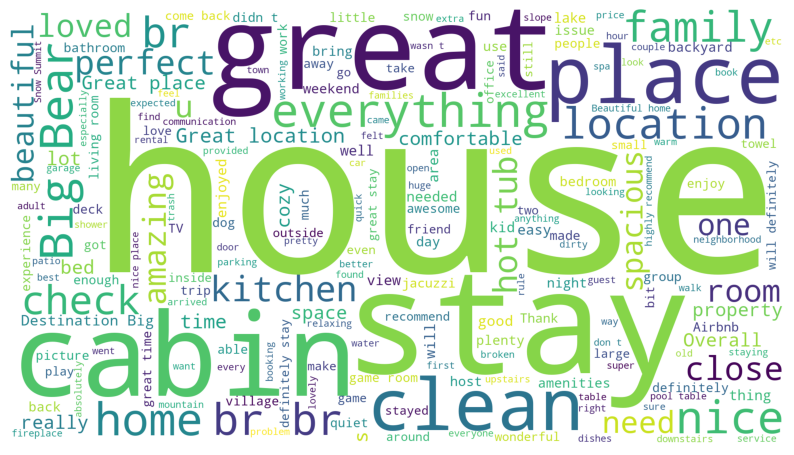

In [11]:
# 1. Destination Big Bear
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_destination_big_bear.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

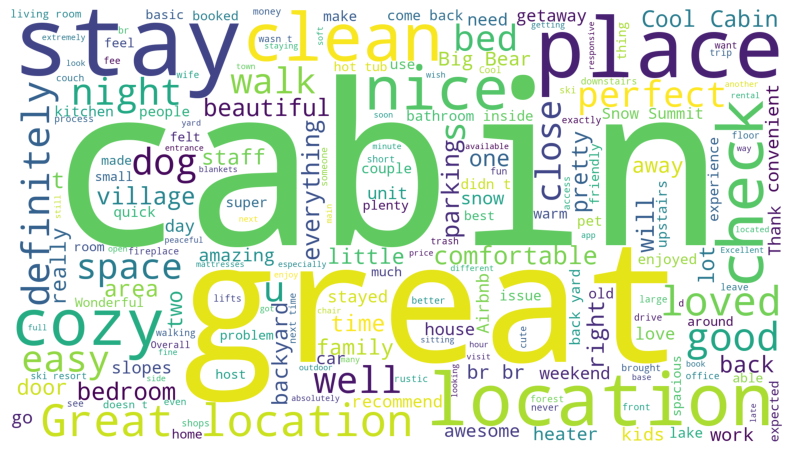

In [12]:
# 2. Cool Cabins 
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_cool_cabins.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

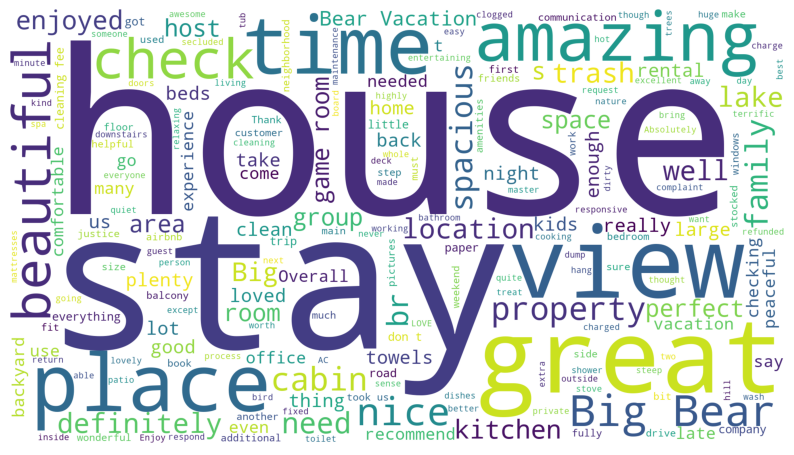

In [13]:
# 3. Big Bear Vacations
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_big_bear_vacations.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

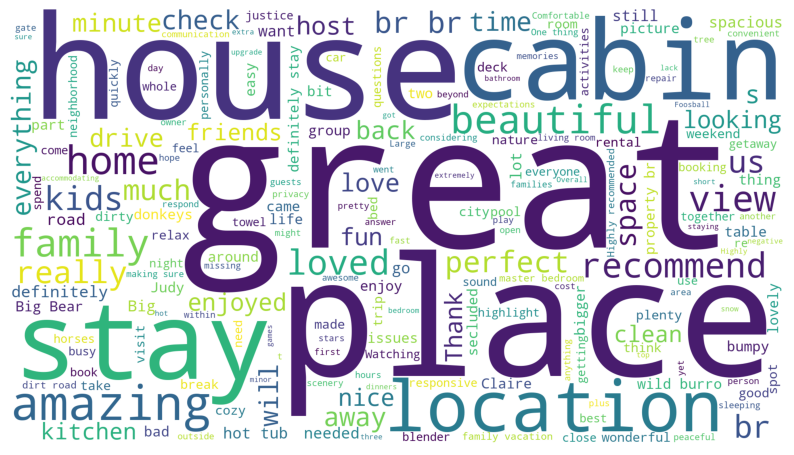

In [14]:
# 4. Claire
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_claire.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

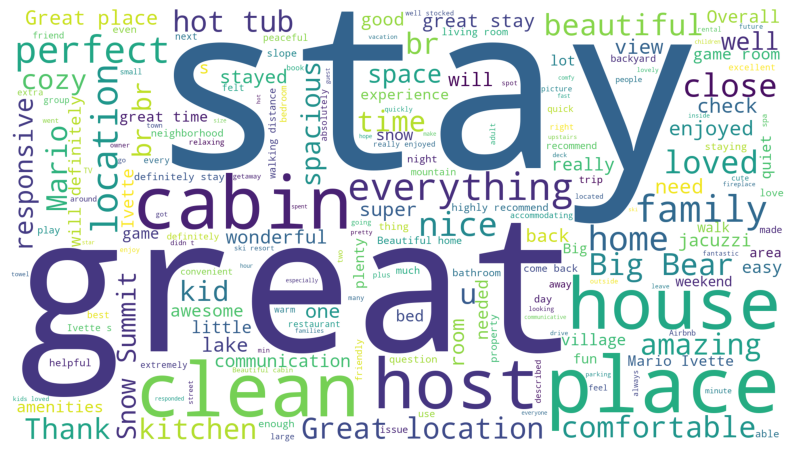

In [15]:
# 5. Mario and Ivette
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_mario_ivette.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

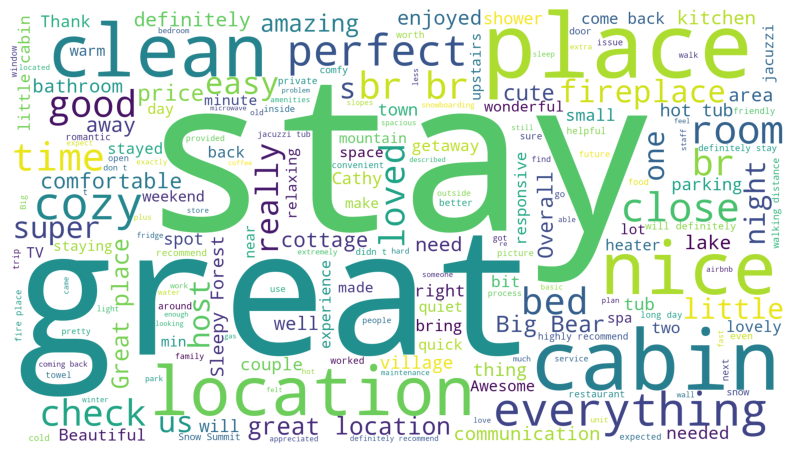

In [16]:
# 6. Sleepy Forest Resort
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_sleepy_forest_resort.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

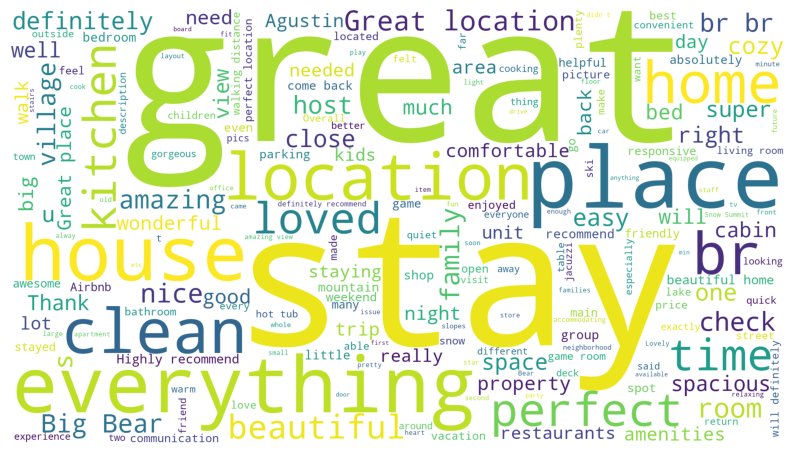

In [17]:
# 7. Agustin
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_agustin.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

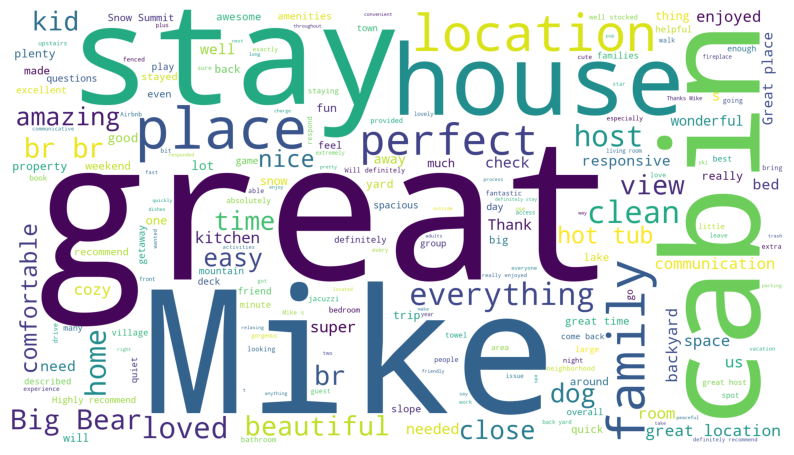

In [18]:
# 8. Mike
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_mike.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

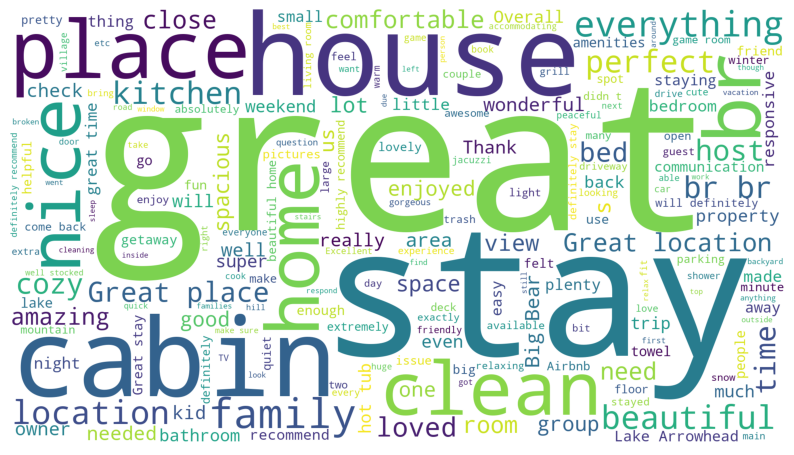

In [19]:
# 9. Evolve
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_evolve.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

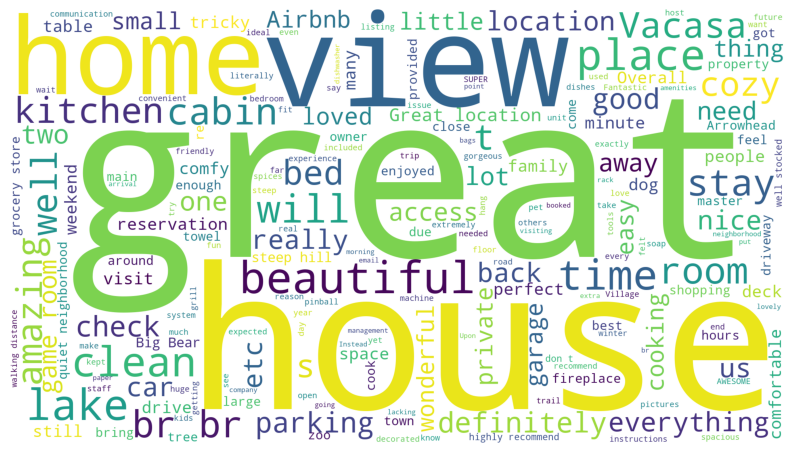

In [20]:
# 10. Vacasa California
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_vacasa_california.all_reviews))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()